# **scRNA-seq Data Analysis using Scanpy**





### In this tutorial, we will walk through a complete single-cell RNA-seq preprocessing workflow using Scanpy. We will:

1. Worlflow Setup
2. Download and Load Dataset
2. Load Gene Count Matrix into AnnData
3. Understanding AnnData Object
4. Summary of AnnData
5. Inspect Components of AnnData
6. Quality Control (QC)
7. Filter Cells and Genes
8. Normalize the Data
9. Identify Highly Variable Genes
10. Scale the Data
11. PCA Analysis
12. Compute Nearest Neighbors
13. UMAP and Visualization

### 1. Workflow Setup

In [1]:
# Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:

# Create Working Directory

import os

project_path = "/content/drive/MyDrive/P.A.R.A/2. Areas/Research/Bioinformatics/scRNA-seq-data-analysis"
os.makedirs(project_path, exist_ok=True)
os.chdir(project_path)

print("Working directory:", os.getcwd())

Working directory: /content/drive/MyDrive/P.A.R.A/2. Areas/Research/Bioinformatics/scRNA-seq-data-analysis


In [ ]:
# Create Subfolders in Working Directory

subfolders = ["data_raw", "data_processed", "notebooks", "results_figures", "results_tables", "scripts"]
for folder in subfolders:
    os.makedirs(folder, exist_ok=True)


In [3]:
# Install Packages

!pip install scanpy anndata scvi-tools celltypist decoupler gseapy matplotlib seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.9/628.9 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 99.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 827.9/827.9 kB 40.8 MB/s eta 0:00:00
   ━━━

In [8]:
# Import Packages

# Import OS module to handle file paths and directories
import os

# Import pandas for working with tabular data and metadata
import pandas as pd

# Import numpy for numerical computations and matrix operations
import numpy as np

# Import Scanpy — the core package for single-cell RNA-seq analysis
import scanpy as sc

### 2. Download and Load Data

In [12]:
# Download publicly available dataset: Peripheral Blood Mononuclear Cells (PBMC)
# https://scanpy.readthedocs.io/en/stable/api.html#module-scanpy.datasets

adata = sc.datasets.pbmc3k()
adata

  0%|          | 0.00/5.58M [00:00<?, ?B/s]

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

### 3. Summary of AnnData Object

In [27]:
# Shape of AnnData Object
adata
print(adata.shape)
print('')
print('##########################################')
print('')
print(adata.obs.info())
print('')
print('##########################################')
print('')
print(adata.var.info())

(2700, 32738)

##########################################

<class 'pandas.core.frame.DataFrame'>
Index: 2700 entries, AAACATACAACCAC-1 to TTTGCATGCCTCAC-1
Empty DataFrame
None

##########################################

<class 'pandas.core.frame.DataFrame'>
Index: 32738 entries, MIR1302-10 to AC002321.1
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   gene_ids  32738 non-null  object
dtypes: object(1)
memory usage: 1.5+ MB
None


### 4. Inspection of AnnData Object

In [28]:
# List the cell names (all)
adata.obs

""
index
AAACATACAACCAC-1
AAACATTGAGCTAC-1
AAACATTGATCAGC-1
AAACCGTGCTTCCG-1
AAACCGTGTATGCG-1
...
TTTCGAACTCTCAT-1
TTTCTACTGAGGCA-1
TTTCTACTTCCTCG-1


No charts were generated by quickchart
No charts were generated by quickchart


In [29]:
# List the cell names (first 5)
adata.obs.head()

""
index
AAACATACAACCAC-1
AAACATTGAGCTAC-1
AAACATTGATCAGC-1
AAACCGTGCTTCCG-1
AAACCGTGTATGCG-1


In [30]:
# List the gene names (all)
adata.var

,gene_ids
index,
MIR1302-10,ENSG00000243485
FAM138A,ENSG00000237613
OR4F5,ENSG00000186092
RP11-34P13.7,ENSG00000238009
RP11-34P13.8,ENSG00000239945
...,...
AC145205.1,ENSG00000215635
BAGE5,ENSG00000268590
CU459201.1,ENSG00000251180


In [31]:
# Load the count matrix
# AnnData stores sparse data in Compressed Sparse Row matrix which are memory efficient instead of large 2-d matrices.
# https://cmdlinetips.com/2018/03/sparse-matrices-in-python-with-scipy/

adata.X

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 2286884 stored elements and shape (2700, 32738)>

In [32]:
# Create a shallow dataframe (No changes to original dataframe)
# Note:
    # Cells by genes in Scanpy
    # Genes by cells in Seurat

adata.to_df()

index,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,RP4-669L17.10,...,KIR3DL2-1,AL590523.1,CT476828.1,PNRC2-1,SRSF10-1,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1
index,,,,,,,,,,,,,,,,,,,,,
AAACATACAACCAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGAGCTAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGATCAGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGCTTCCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGTATGCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTCTACTGAGGCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTCTACTTCCTCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Save the raw data before processing values and further filtering
adata.raw = adata

### 5. Quality Control on AnnData Object

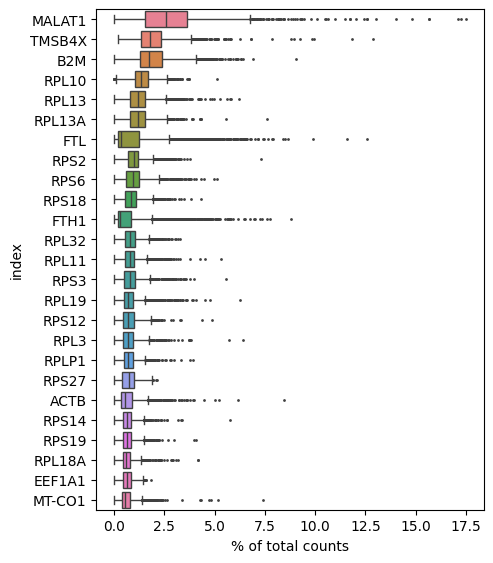

In [34]:
# The 25 top genes with the highest mean fraction over all cells
sc.pl.highest_expr_genes(adata, n_top=25)

In [35]:
# Colab project push to GitHub
# 1. identity
!git config --global user.name "mahfuzenam"
!git config --global user.email "mahfuzenam@live.com"

# 2. load PAT from Colab Secrets
from google.colab import userdata
os.environ['GITHUB_TOKEN'] = userdata.get('github_token')

# 3. auto-supply token to Git
!git config --global credential.helper '!f() { echo username=token; echo password=$GITHUB_TOKEN; }; f'

# 4. normal commit & push
!git add .
!git commit -m "update notebook"
!git push origin main

# 5. tidy up (optional)
!git config --global --unset credential.helper

[main 17bf1aa] update notebook
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite notebooks/scRNA-seq-data-analysis.ipynb (91%)
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 2 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 52.45 KiB | 2.62 MiB/s, done.
Total 4 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/mahfuzenam/scRNA-seq-data-analysis.git
   7145511..17bf1aa  main -> main
